In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scores_path = "/workspace/deception-detection/results/repe_lr__repe_honesty__plain__llama-70b-3.3__20251102_210823/scores.json"

with open(scores_path, "r") as f:
    scores = json.load(f)

In [3]:
scores.keys()

dict_keys(['repe_honesty__plain_val', 'roleplaying__plain', 'deception_dilution_repe__plain', 'deception_dilution_sandbagging_v2__plain'])

In [4]:
dilution_scores = scores["deception_dilution_sandbagging_v2__plain"]
dilution_scores.keys()

dict_keys(['scores', 'labels'])

In [5]:
len(dilution_scores["scores"])

1200

#### Deception Dilution as Inference Time Attacks
- n-statement deception dilution across 10 same prompts (bar chart) (n = 1 to 10) include the base deception prompt as well

In [6]:
dilution_scores_averaged = [np.mean(shard) for shard in dilution_scores["scores"]]
dilution_scores_reshaped = np.array(dilution_scores_averaged).reshape(10, 120).tolist()
all_scores = dilution_scores_reshaped
len(all_scores)

10

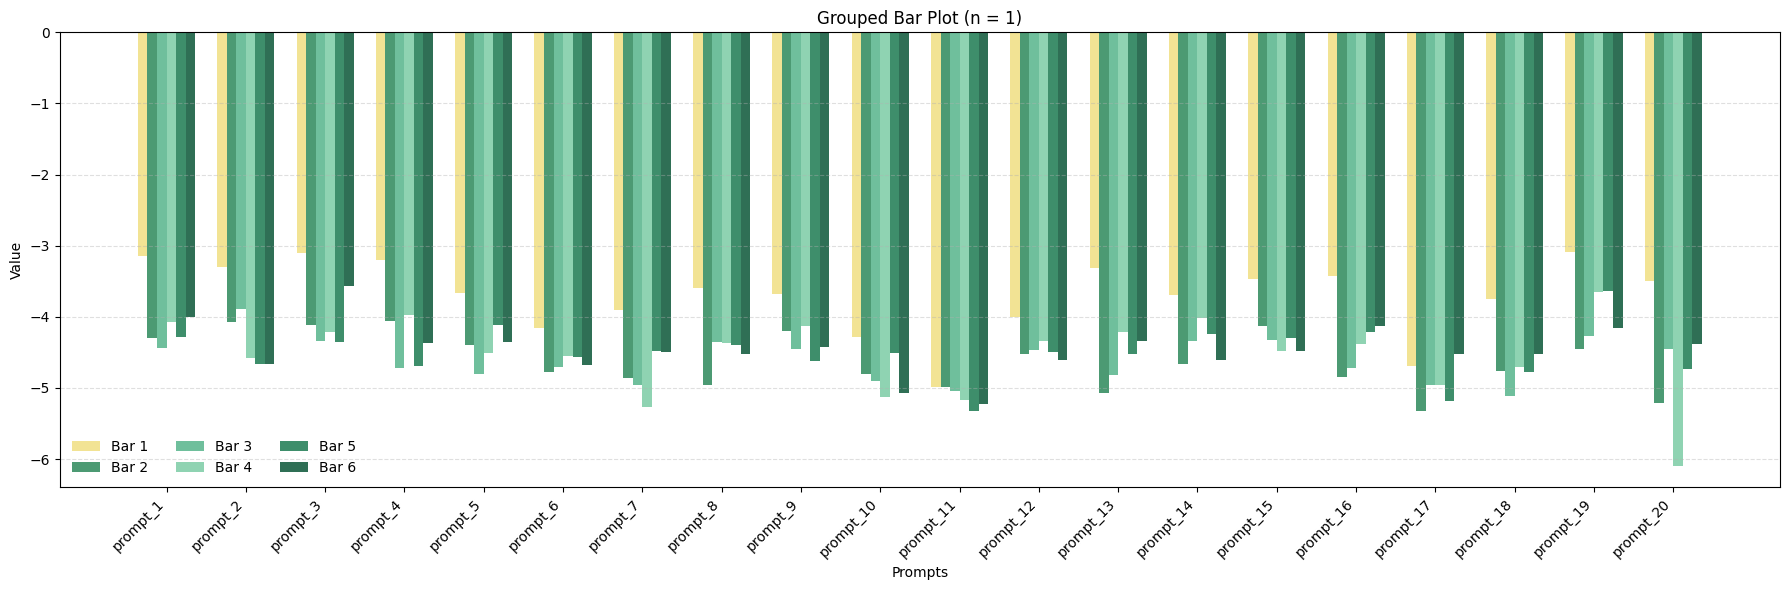

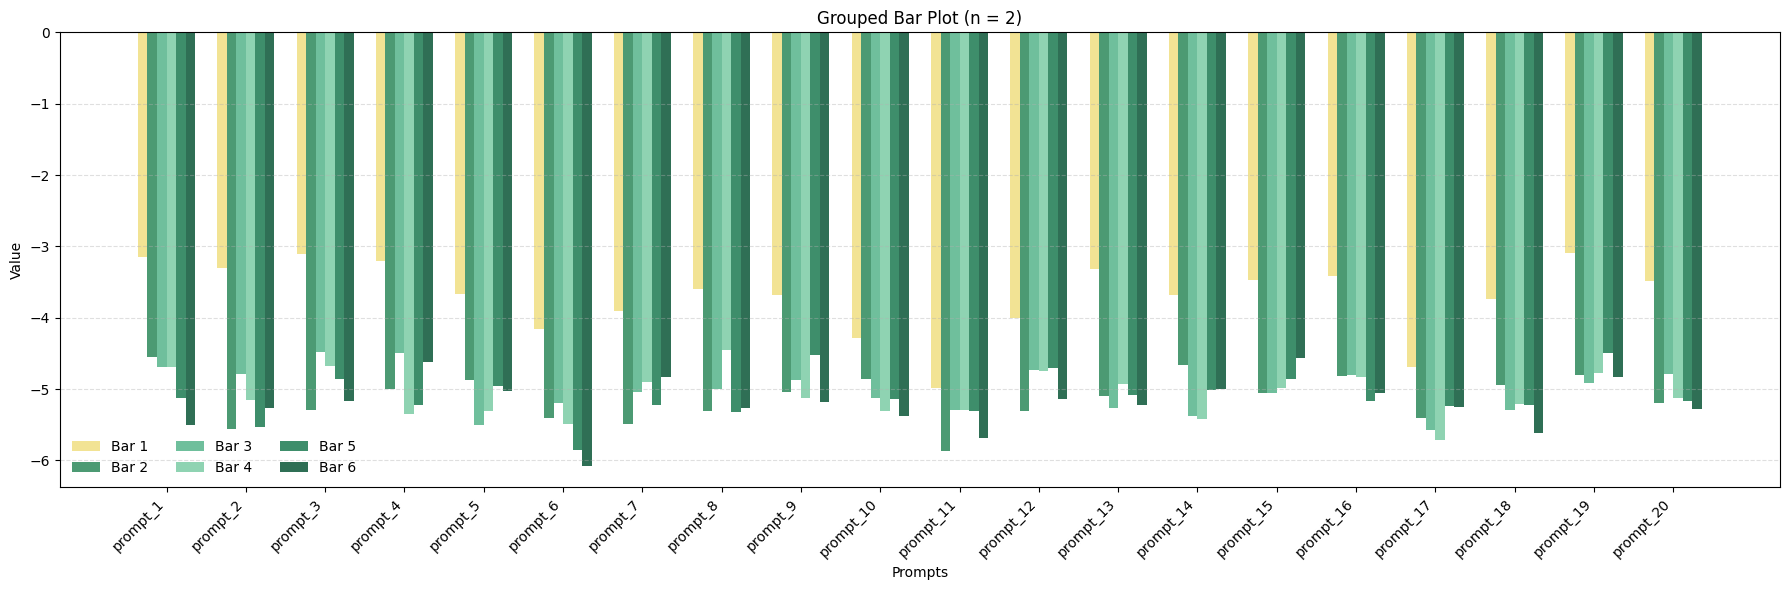

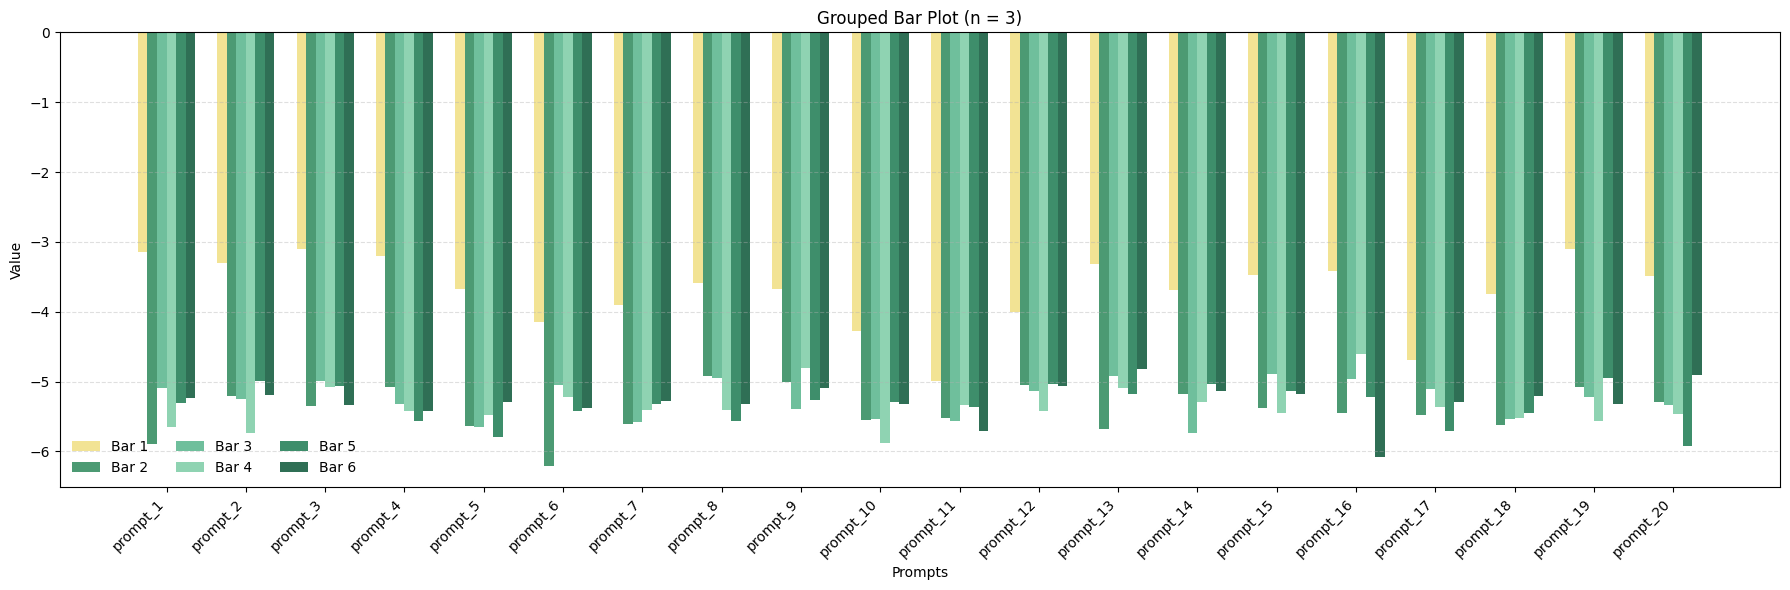

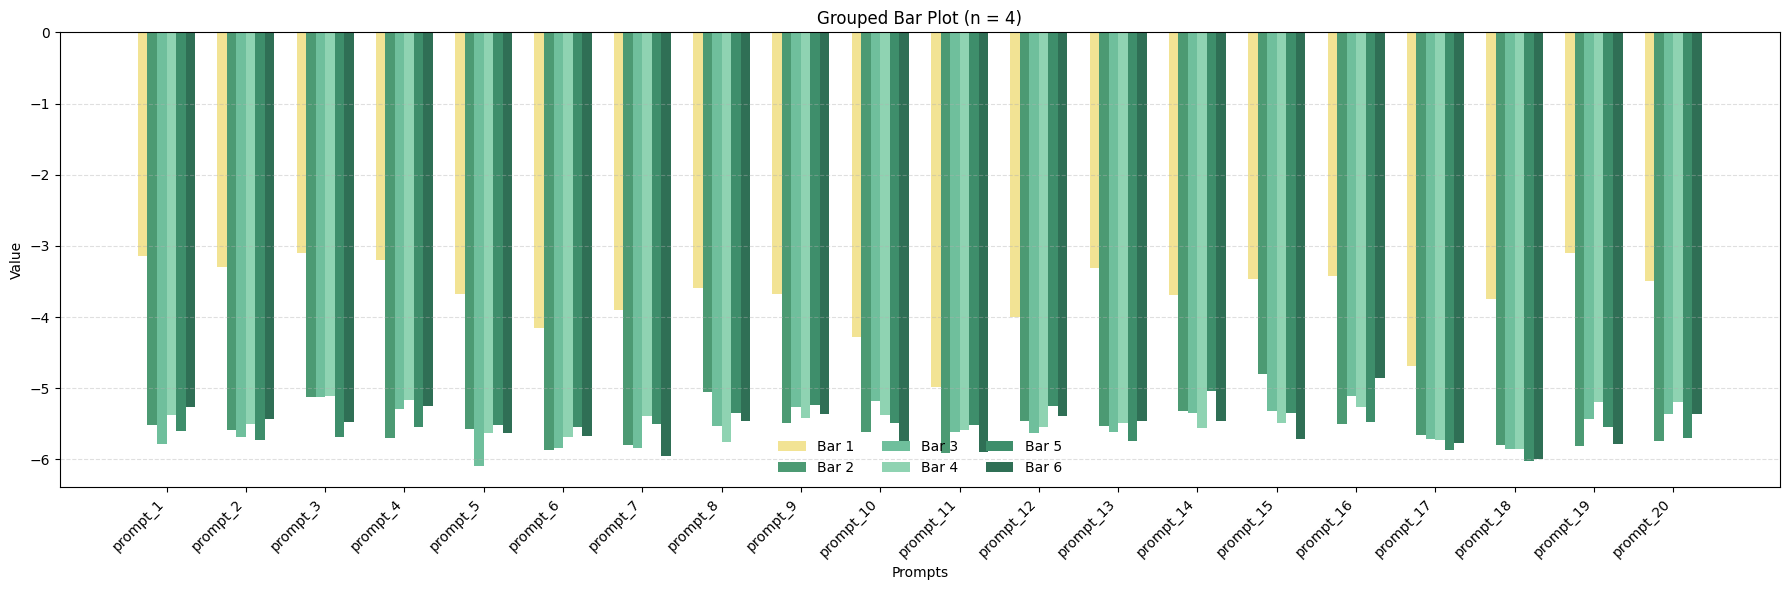

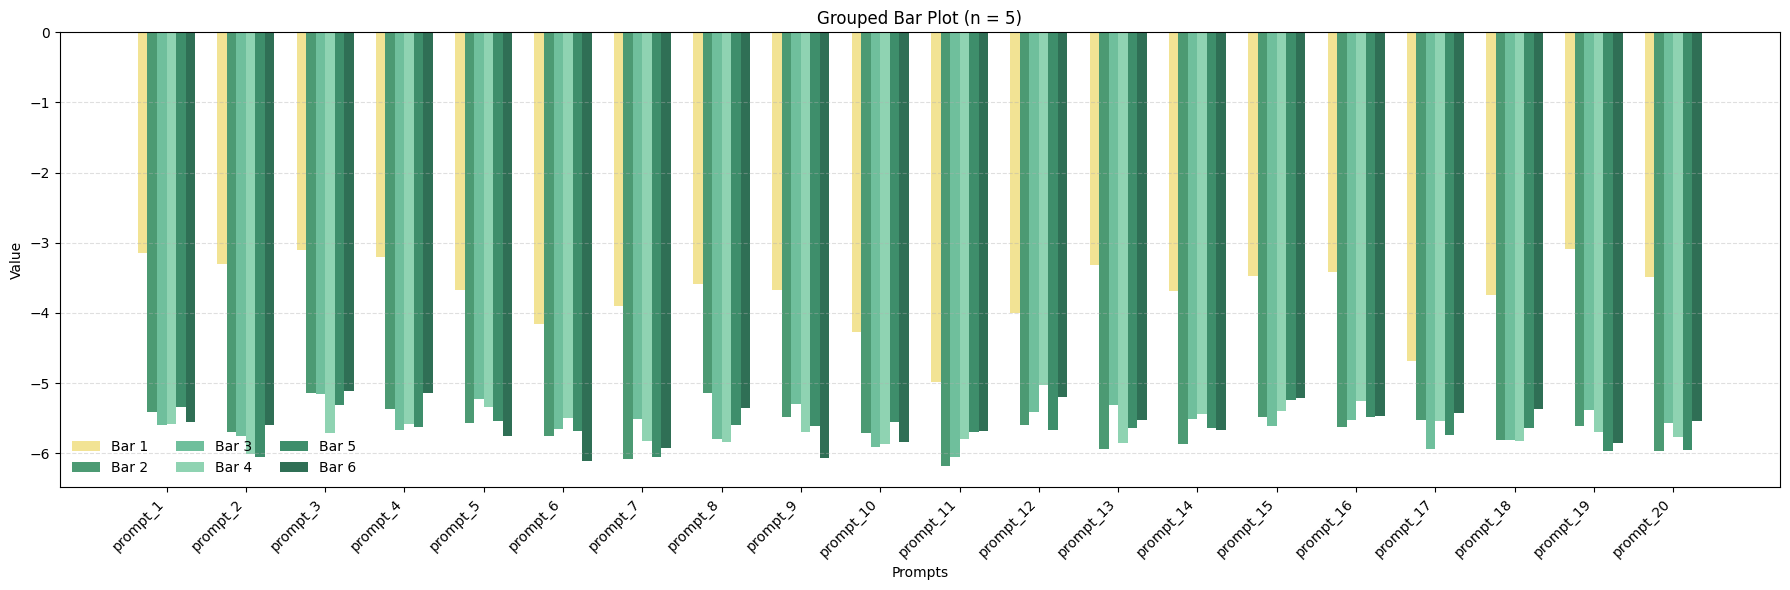

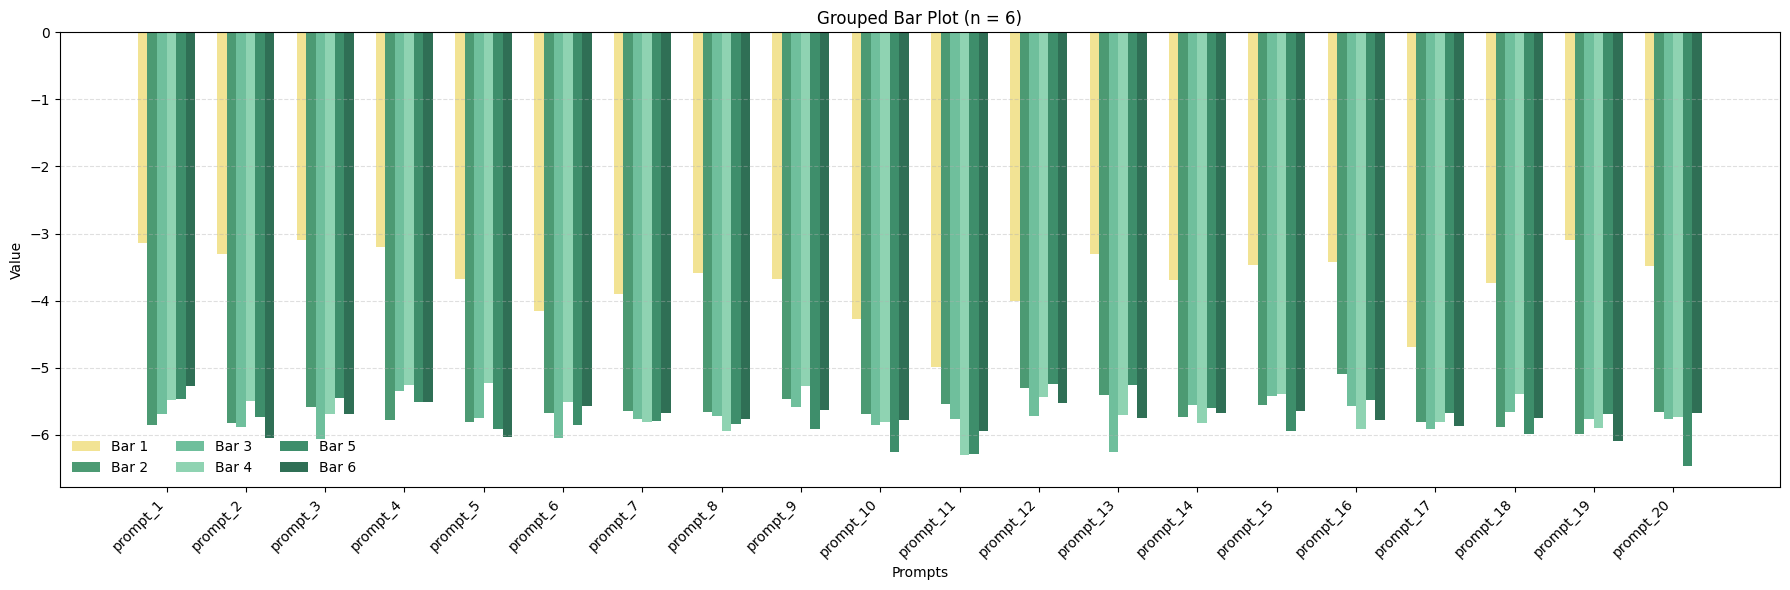

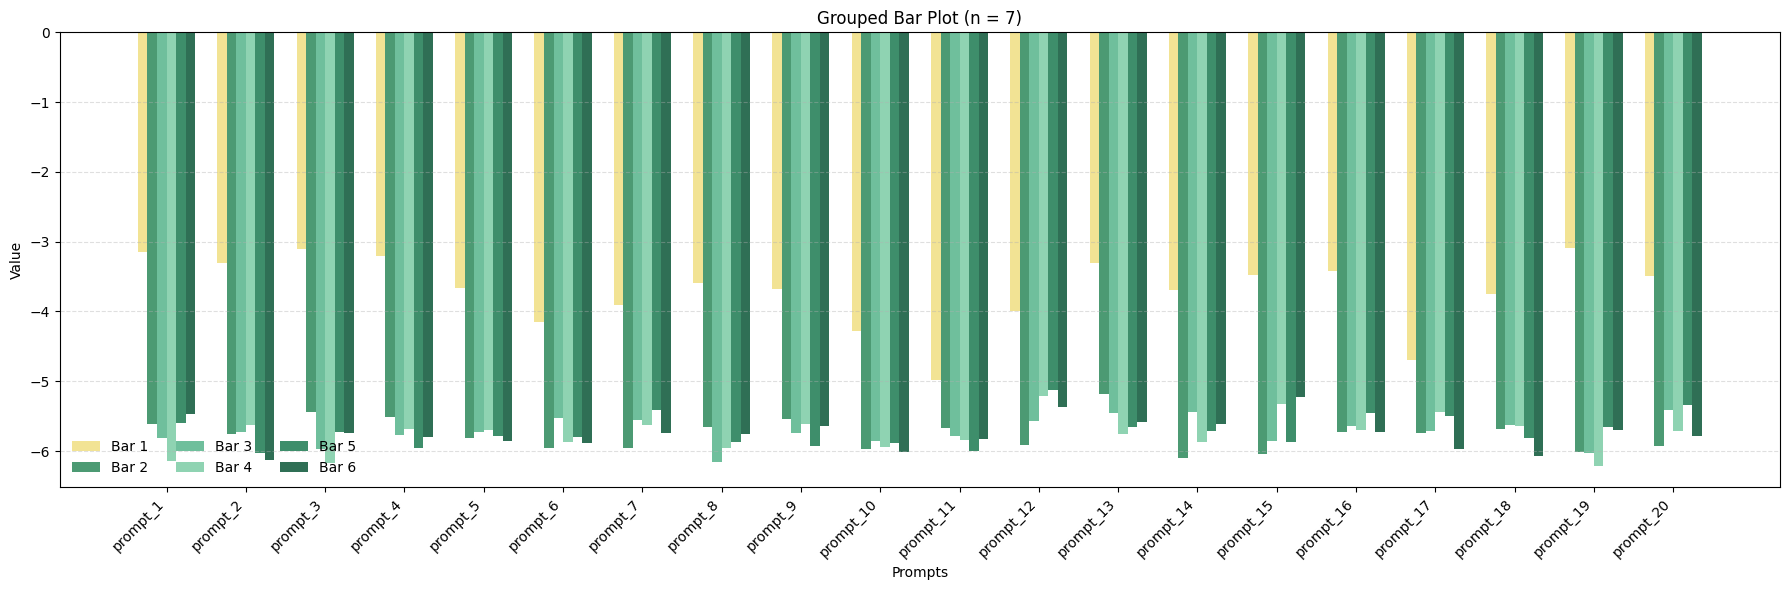

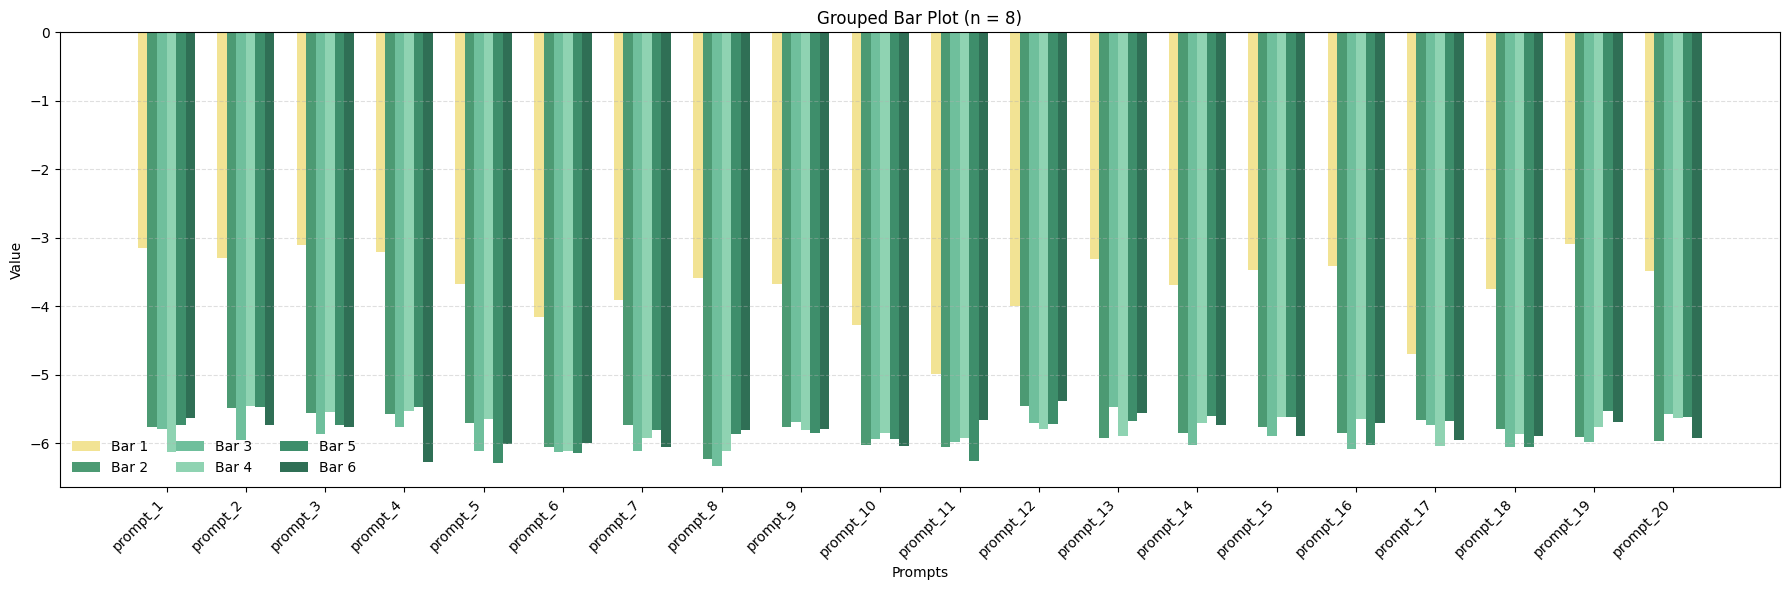

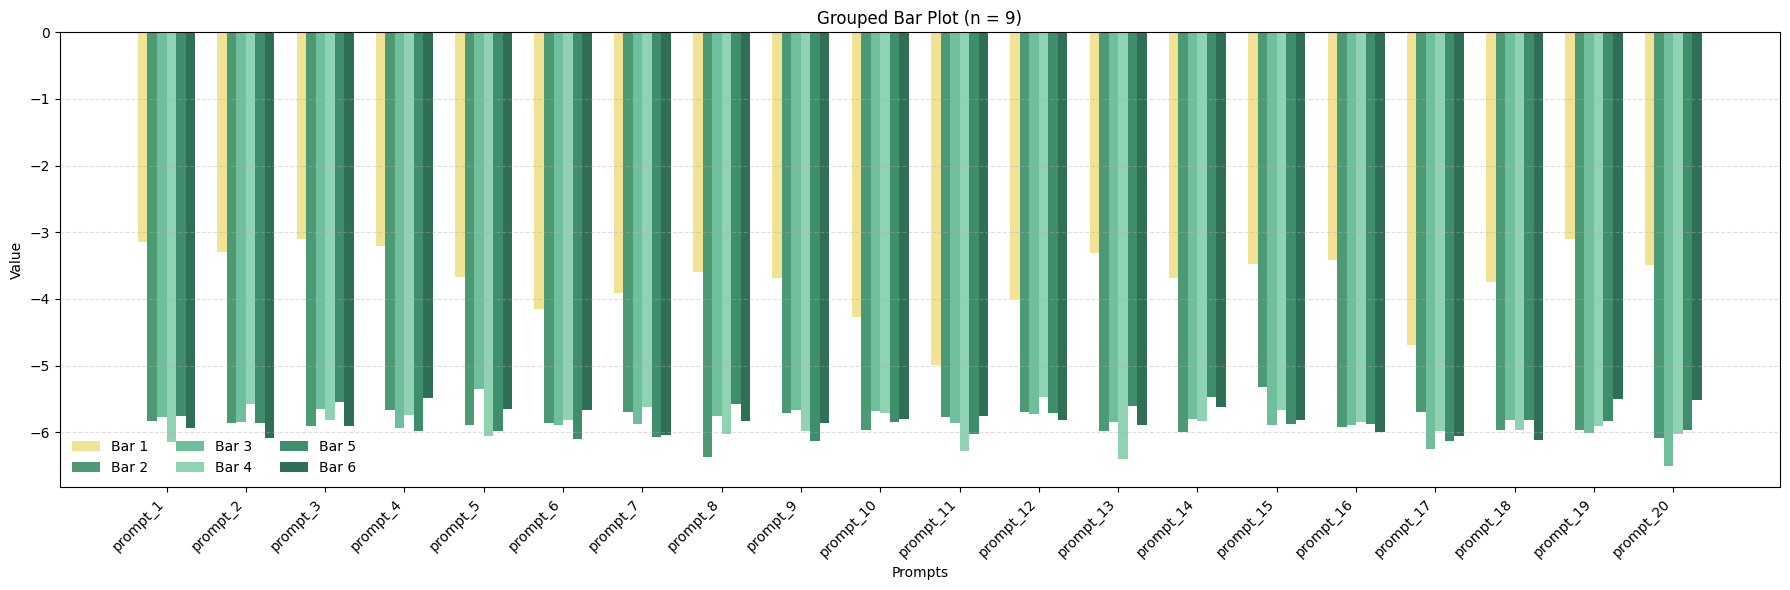

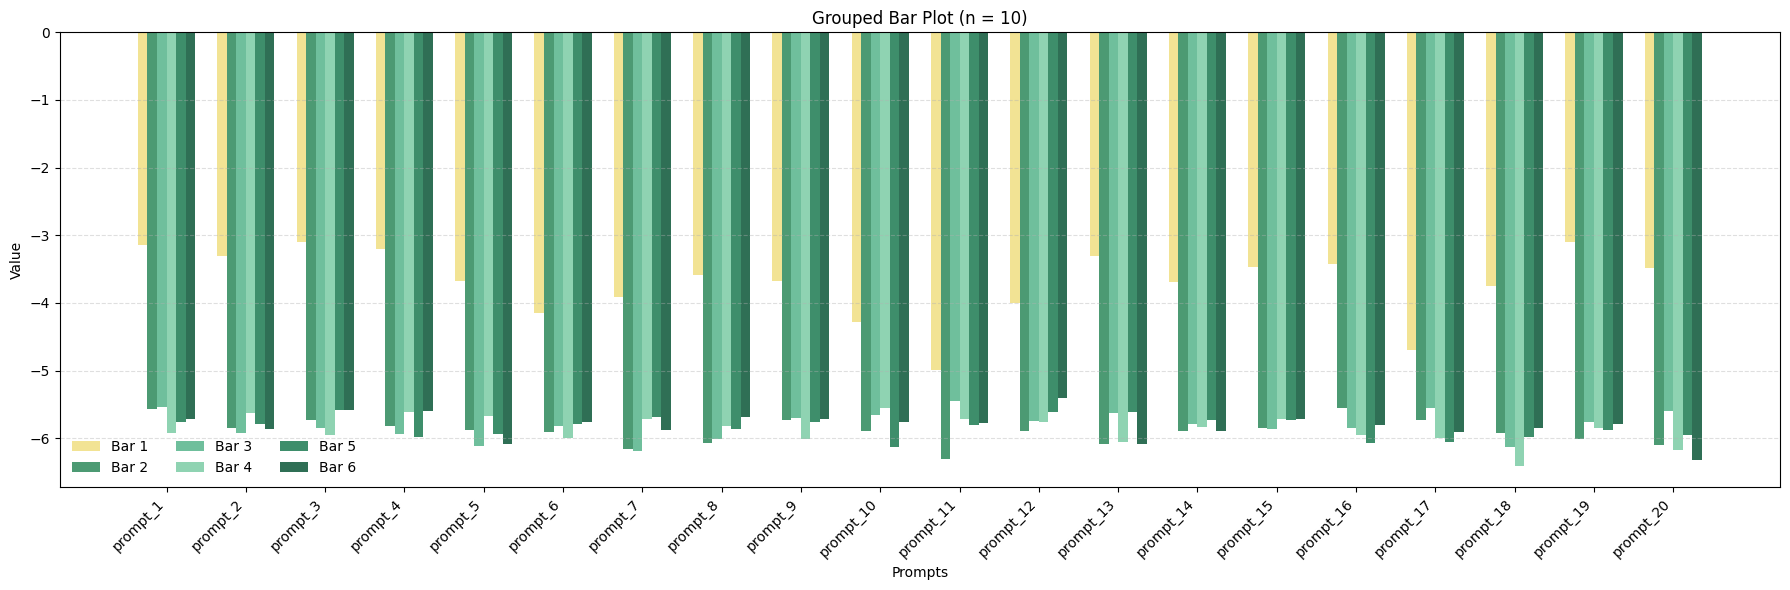

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ================================
# CONFIGURATION
# ================================
USE_GREEN_SHADES = True   # False → use blue shades

YELLOW = "#F2E394"

GREEN_SHADES = [
    "#4C9A73",
    "#6FBF9C",
    "#8FD3B2",
    "#3E8E6B",
    "#2F6F55",
]

BLUE_SHADES = [
    "#4C72B0",
    "#6C8EBF",
    "#8FAAD3",
    "#3E5C8A",
    "#2F4B6F",
]

colors = [YELLOW] + (GREEN_SHADES if USE_GREEN_SHADES else BLUE_SHADES)

# ================================
# PLOTTING LOOP
# ================================
prompts = [f"prompt_{i+1}" for i in range(20)]
x = np.arange(len(prompts))
bar_width = 0.12

for idx, scores in enumerate(all_scores, start=1):

    # Safety checks
    assert len(scores) == 120, f"List {idx} does not contain 120 values"

    # Reshape
    data = np.array(scores).reshape(20, 6)

    plt.figure(figsize=(18, 6))

    for i in range(6):
        plt.bar(
            x + (i - 2.5) * bar_width,
            data[:, i],
            width=bar_width,
            color=colors[i],
            label=f"Bar {i+1}"
        )

    # Formatting
    plt.xticks(x, prompts, rotation=45, ha="right")
    plt.ylabel("Value")
    plt.xlabel("Prompts")
    plt.title(f"Grouped Bar Plot (n = {idx})")

    plt.legend(frameon=False, ncol=3)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()


- n-statement deception dilution averaged over all prompts scatter plot. (n = 1 to 10) (Number of deception prompts = 20)

In [8]:
np.asarray(all_scores).shape

(10, 120)

In [9]:
scores_across_n_max = []
scores_across_n_mean = []
for i in range(len(all_scores)):
    all_scores[i] = np.array(all_scores[i]).reshape(20, 6)
    prompt_wise_scores_max = []
    prompt_wise_scores_mean = []
    for j in range(20):
        deception_score = all_scores[i][j][0]
        min_dilution_score = min(all_scores[i][j][1:])
        max_change_fraction = ((deception_score - min_dilution_score) / abs(deception_score)) 
        avg_change_fraction = (abs(np.mean(all_scores[i][j][1:]) - deception_score) / abs(deception_score))
        prompt_wise_scores_max.append(max_change_fraction)
        prompt_wise_scores_mean.append(avg_change_fraction)
        
    scores_across_n_max.append(np.mean(prompt_wise_scores_max))    
    scores_across_n_mean.append(np.mean(prompt_wise_scores_mean))

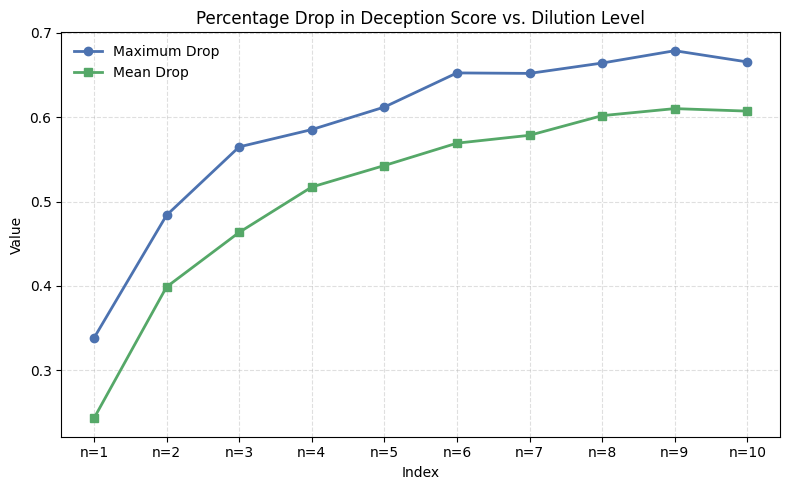

In [10]:
x = [f"n={i}" for i in range(1, 11)]

# Professional, muted colors
BLUE = "#4C72B0"    # muted blue
GREEN = "#55A868"   # muted green

plt.figure(figsize=(8, 5))

plt.plot(
    x,
    scores_across_n_max,
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=6,
    color=BLUE,
    label="Maximum Drop"
)

plt.plot(
    x,
    scores_across_n_mean,
    marker="s",
    linestyle="-",
    linewidth=2,
    markersize=6,
    color=GREEN,
    label="Mean Drop"
)

# Formatting
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Percentage Drop in Deception Score vs. Dilution Level")
plt.legend(frameon=False)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [11]:
reduction_scores = [[] for i in range(20)]
for i in range(len(all_scores)):
    all_scores[i] = np.array(all_scores[i]).reshape(20, 6)
    for j in range(20):
        if i == 0:
            reduction_scores[j].append(all_scores[i][j][0])
            reduction_scores[j].append(min(all_scores[i][j][1:]))
            
        else:
            reduction_scores[j].append(min(all_scores[i][j][1:]))

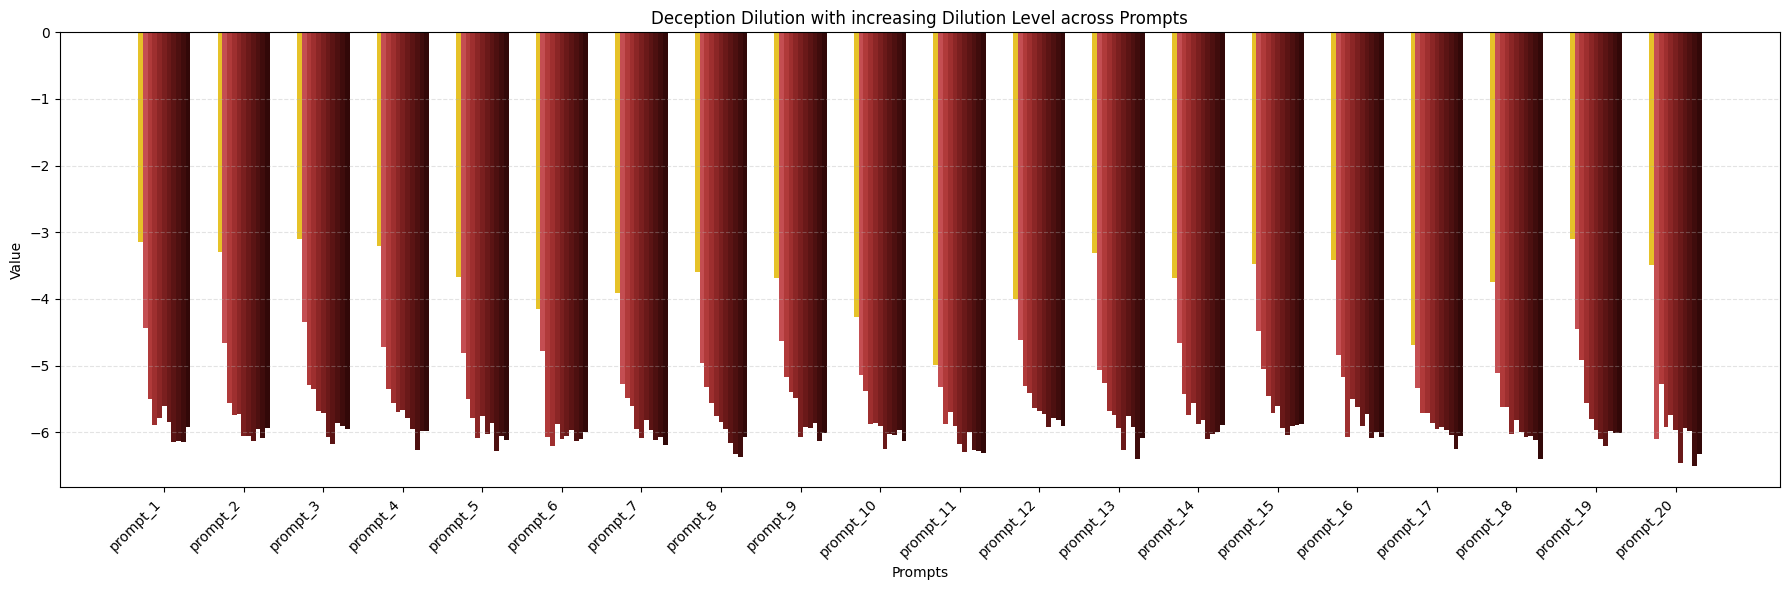

In [12]:
data = np.array(reduction_scores)
# -------------------------------
# AXIS SETUP
# -------------------------------
x_labels = [f"prompt_{i+1}" for i in range(20)]
x = np.arange(len(x_labels))

bar_width = 0.06

# -------------------------------
# COLORS (High-contrast, professional)
# -------------------------------
YELLOW = "#E6C229"  # muted golden yellow

RED_SHADES = [
    "#C44E52",  # muted red
    "#B03A3A",
    "#9E2F2F",
    "#8B2626",
    "#7A1F1F",
    "#6A1919",
    "#5B1414",
    "#4D1010",
    "#3F0C0C",
    "#320808",
]

colors = [YELLOW] + RED_SHADES

# -------------------------------
# PLOT
# -------------------------------
plt.figure(figsize=(18, 6))

for i in range(11):
    plt.bar(
        x + (i - 5) * bar_width,
        data[:, i],
        width=bar_width,
        color=colors[i]
    )

# -------------------------------
# FORMATTING
# -------------------------------
plt.xticks(x, x_labels, rotation=45, ha="right")
plt.xlabel("Prompts")
plt.ylabel("Value")
plt.title("Deception Dilution with increasing Dilution Level across Prompts")

plt.grid(axis="y", linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()